In [4]:
# Import necessary libraries for preprocessing
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Load the dataset
#Atlanta_Distance = pd.read_pickle(r'~/Documents/NYCDSA/Capstone/Pickle Files/Atlanta_Nearest_POI.pkl')
Atlanta_Distance = pd.read_csv('~/Documents/NYCDSA/Capstone/Nearest_Distances_Atlanta/Atlanta_Nearest_Distances.csv')
Atlanta_Distance['TotalBath'] = Atlanta_Distance['number_of_full_baths'] + (Atlanta_Distance['number_of_half_baths']*0.5)
Atlanta_Distance = Atlanta_Distance.drop(columns=['ID', 'year_built', 'source_name',
                                                  'listing_date', 'mls_id', 'census_zcta5_geoid',
                                                  'census_cbsa_geoid', 'latitude', 'longitude', 'lot_size_in_acres', 'number_of_full_baths', 'number_of_half_baths'])
Atlanta_Distance

,street_address,city,state,current_listing_price,number_of_bedrooms,living_area_square_feet,lot_size_in_square_feet,has_pool,has_garage,number_of_garage_spaces,...,Distance_SC,Convenience_POI,Distance_C,Supermarket_POI,Distance_SM,Variety_store_POI,Distance_VS,Wholesale_POI,Distance_WS,TotalBath
0,0 ivy MNR DR NW 0,Marietta,GA,2865,4,3259.0,14810.400390,False,True,NaN,...,2539.28,Sunoco,2715.74,Kroger,1654.08,Bargain Hunt,6405.99,Atlanta Wholesale,10917.45,2.5
1,1 10 buena VIS CIR SE,Cartersville,GA,2200,3,1993.0,NaN,False,False,NaN,...,492.63,Mack's Express,1407.26,Publix,3065.55,Dollar Tree,405.11,LI Global Liquidation,32739.68,2.0
2,1 1088 coldwater DR,Griffin,GA,2000,3,1910.0,NaN,False,True,NaN,...,25413.80,Unnamed POI,3213.19,Kroger,3780.13,Dollar General,4738.04,Costco,29267.11,2.0
3,1 1130 willivee DR,Decatur,GA,1995,3,1134.0,NaN,False,False,NaN,...,7857.71,Food Mart,2385.60,Publix,2320.59,Dollar Tree,4356.55,Sam's Club,9020.53,1.0
4,1 1307 idlewood CT,Mcdonough,GA,2800,4,2532.0,NaN,False,True,NaN,...,11676.91,Crossings at McDonough,14263.22,Kroger,5625.35,Dollar Tree,6721.22,Costco,14750.79,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21025,procurement only - 66 4th ST,Newnan,GA,1600,3,1367.0,NaN,False,True,NaN,...,19852.16,Newnan Lakes Chevron,4983.93,Little Giant Supermaket,2097.35,Family Dollar,6409.21,Two Valleys Distribution,47285.12,2.0
21026,r2188 executive DR,Duluth,GA,2199,3,1696.0,871.199981,False,False,NaN,...,4864.86,Unnamed POI,1477.04,Mega Mart,888.22,Dollar Tree,6142.54,Sam's Club,2009.36,2.5
21027,r3339 woodward down,Buford,GA,2380,3,1944.0,4356.000065,False,False,NaN,...,1359.41,Walgreens,3952.51,ALDI,1158.08,Five Below,714.63,Sam's Club,1507.23,3.5
21028,singleunit 216 greensprings DR,Palmetto,GA,1900,4,1204.0,NaN,False,False,NaN,...,10787.35,Flash Foods,1242.13,Publix,8779.81,Family Dollar,1402.52,Costco,40632.51,2.0


In [3]:
# Exclude 'current_listing_price' from features
numeric_features = Atlanta_Distance.select_dtypes(include=['int64', 'float64']).drop(columns=['current_listing_price']).columns
#categorical_features = list(Atlanta_Distance.columns[Atlanta_Distance.dtypes == 'object'])

In [4]:
# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.fillna("None")

# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for nominal categorical features: Fill missing values with 'None' then apply one-hot encoding
#categorical_transformer = Pipeline(steps=[
    #('impute_none', SimpleImputer(strategy='constant', fill_value='None')),  # Using SimpleImputer
    #('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

# Combined preprocessor for numeric and nominal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('nominal', categorical_transformer, categorical_features)
])

transformed_data = preprocessor.fit_transform(Atlanta_Distance)

In [5]:
# Generate column names for the one-hot encoded features
#onehot_features = preprocessor.named_transformers_['nominal'].named_steps['onehot'].get_feature_names_out()
# Combine all feature names
all_feature_names = list(numeric_features)
all_feature_names

['number_of_bedrooms',
 'living_area_square_feet',
 'lot_size_in_square_feet',
 'number_of_garage_spaces',
 'number_of_stories',
 'Distance_SC',
 'Distance_C',
 'Distance_SM',
 'Distance_VS',
 'Distance_WS',
 'TotalBath']

In [6]:
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)
transformed_df

,number_of_bedrooms,living_area_square_feet,lot_size_in_square_feet,number_of_garage_spaces,number_of_stories,Distance_SC,Distance_C,Distance_SM,Distance_VS,Distance_WS,TotalBath
0,0.641597,1.314458,-0.032969,-7.852818e-16,4.979361e-03,-0.853173,-0.558145,-0.543492,0.542177,-0.636596,0.050686
1,-0.459495,0.111649,0.000000,-7.852818e-16,-3.328122e-17,-1.210464,-0.973201,-0.086966,-1.156373,1.494897,-0.167469
2,-0.459495,0.032791,0.000000,-7.852818e-16,-3.328122e-17,3.140114,-0.400352,0.144158,0.070063,1.155713,-0.167469
3,-0.459495,-0.704476,0.000000,-7.852818e-16,-3.328122e-17,0.075285,-0.662867,-0.327916,-0.037918,-0.821878,-0.603778
4,0.641597,0.623745,0.000000,-7.852818e-16,-3.328122e-17,0.742016,3.104770,0.740976,0.631403,-0.262173,-0.167469
...,...,...,...,...,...,...,...,...,...,...,...
21025,-0.459495,-0.483106,0.000000,-7.852818e-16,-3.328122e-17,2.169198,0.161335,-0.400121,0.543088,2.915627,-0.167469
21026,-0.459495,-0.170527,-0.033365,-7.852818e-16,-3.328122e-17,-0.447188,-0.951067,-0.791202,0.467607,-1.506697,0.050686
21027,-0.459495,0.065094,-0.033266,-7.852818e-16,-3.328122e-17,-1.059147,-0.165836,-0.703919,-1.068764,-1.555742,0.486995
21028,0.641597,-0.637970,0.000000,-7.852818e-16,-3.328122e-17,0.586722,-1.025581,1.761256,-0.874056,2.265832,-0.167469


In [7]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
# Define the Kernel Ridge Regression model with default parameters
krr_model = KernelRidge(kernel='rbf')  #radial basis function kernel (default kernel), which captures non-linear relationships.
# Create a full pipeline with preprocessing and the Kernel Ridge Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', krr_model)
])
X = Atlanta_Distance.drop(columns='current_listing_price')
y = Atlanta_Distance['current_listing_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['number_of_bedrooms', 'living_area_square_feet',
       'lot_size_in_square_feet', 'number_of_garage_spaces',
       'number_of_stories', 'Distance_SC', 'Distance_C', 'Distance_SM',
       'Distance_VS', 'Distance_WS', 'TotalBath'],
      dtype='object'))])),
                ('regressor', KernelRidge(kernel='rbf'))])

In [8]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_score_gb = cross_val_score(pipeline, X_train, y_train, scoring = 'r2', cv=kf, n_jobs = -1)
print(cross_val_score_gb)
print('Avg Score:',np.mean(cross_val_score_gb))
print('Variance:',np.var(cross_val_score_gb))

[0.46477242 0.52564953 0.42610341 0.44238339 0.46607149 0.42879153
 0.47832884 0.47075299 0.36370248 0.44488925]
Avg Score: 0.45114453300888335
Variance: 0.001597171877392323


In [5]:
scores = [0.46477242, 0.52564953, 0.42610341, 0.44238339, 0.46607149, 0.42879153, 0.47832884, 0.47075299, 0.36370248, 0.44488925]
df_scores = pd.DataFrame({
    'Fold': [f'F{i+1}' for i in range(len(scores))],
    'Score': scores
})
df_scores

,Fold,Score
0,F1,0.464772
1,F2,0.525650
2,F3,0.426103
3,F4,0.442383
4,F5,0.466071
5,F6,0.428792
6,F7,0.478329
7,F8,0.470753
8,F9,0.363702
9,F10,0.444889


C:\Users\immed\Programming\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\immed\Programming\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


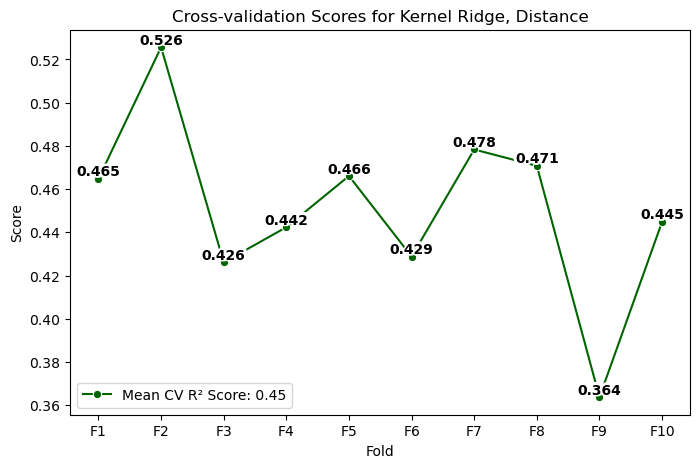

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects

# Creating a seaborn line plot with dark green color
plt.figure(figsize=(8, 5))
sns.lineplot(x='Fold', y='Score', data=df_scores, marker='o', color='darkgreen')

# Annotating each point with bold font and white outline
for i, score in enumerate(df_scores['Score']):
    # White outline (larger text in white)
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='white', 
             path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="white")])
    # Bold, dark text on top
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross-validation Scores for Kernel Ridge, Distance')
plt.grid(False)

plt.legend(labels=['Mean CV R² Score: 0.45'], loc='lower left')

# Display the plot
plt.show()